## Introduction
Welcome back! In this lesson, we are taking a deep dive into one of the most important aspects of machine learning: model evaluation. Evaluating your model is like getting the final results of an exam—it tells you how well all your hard work has paid off and where improvements can be made. We will learn how to assess our model's performance using TensorFlow's tools, understand the training dynamics through the history object, and visualize loss data with Matplotlib. By the end of this lesson, you'll be equipped with the skills to confidently evaluate any TensorFlow model, ensuring it performs well on unseen data. Let’s get started!

## Deep Dive into Model Evaluation
Evaluation is a crucial step in a machine learning pipeline, as it tells us how well our model performs on unseen data. Performance during training doesn't guarantee real-world success, just like excelling at practice questions doesn't ensure acing the actual test.

Our model was trained using the adam optimizer and categorical_crossentropy loss function. The addition of the accuracy metric during compilation helps quickly gauge performance.

Beware of overfitting, where a model performs well on training data but poorly on test data. Overfitting occurs when a model learns the noise in the training data, negatively impacting its performance on new data. Don't worry; we'll soon learn how to detect it.

## Recap: Loading Data and Training the Model
Before we dive into evaluating our model, let's quickly recap the steps we took to load our data and train the model. Here’s the code we used to preprocess our data:

```Python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def load_preprocessed_data():
    # Load the Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    # Scale the features
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # One-hot encode the targets
    encoder = OneHotEncoder(sparse_output=False).fit(y_train.reshape(-1, 1))
    y_train_encoded = encoder.transform(y_train.reshape(-1, 1))
    y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

    return X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded
```

Later on we implemented the following code to train our model on the preprocessed data:

```Python
import tensorflow as tf
from data_preprocessing import load_preprocessed_data

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_data=(X_test, y_test))
```
In summary:

1. We started by loading the preprocessed data using our custom function load_preprocessed_data() from a separate file named data_preprocessing.py to obtain our training and testing datasets: X_train, X_test, y_train, and y_test.
2. We defined a sequential model using TensorFlow's Keras API, with input shapes matching our dataset and various dense layers featuring ReLU and Softmax activations.
3. The model was compiled with the Adam optimizer and categorical crossentropy loss function, and we included accuracy as a metric.
4. We then trained the model over 150 epochs with a batch size of 5, validating its accuracy and loss on the test data as training progressed.
Now that we are refreshed on the training steps, let's proceed to evaluate how well our model performs.

## Evaluating Model with TensorFlow's evaluate Function
We evaluate a model in TensorFlow using the evaluate method of the model. It's super handy and easy to use.

Here's how we can do so:

```Python
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
```

In the above example, model.evaluate(X_test, y_test) computes the loss based on our test data (X_test, y_test), using the loss function specified in model.compile(). In our case, this is the categorical_crossentropy loss. The function returns the loss and any metric defined in model.compile(). We recorded the returned values into test_loss and test_accuracy.

This method gives us a quick overview of how our model performs on unseen data. Remember: a lower loss and a higher accuracy indicate better performance.

```Python
print(f'Test Accuracy: {test_accuracy}, Test Loss: {test_loss}')

```
The output of the above code will be:

```sh

Test Accuracy: 0.9111111164093018, Test Loss: 0.151137113571167
```

This shows how our model performed on the test dataset. Despite being a simple example, observing the test accuracy and loss helps us gauge the model's effectiveness in dealing with new, unseen data.


## Understanding Training History
Do you remember the fit method we used to train our model? This method returns a history object, which has a history attribute. This attribute is a dictionary holding the running loss and metrics values. Simply put, it holds the performance of our model at each epoch during training.

Let's extract the training and validation loss from the history object:

```Python
# Extract loss data from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
```
Here, training_loss holds the loss of the model at each epoch during training, and validation_loss holds the loss of the model at each epoch on the validation set.

These values are vital for us to visualize the performance of our model over time, which significantly helps in identifying where the model might be underfitting or overfitting.

##  Visualizing Loss Data with Matplotlib
Matplotlib is a powerful data visualization library in Python. It allows us to plot our data in various ways to better understand it.

In the following code, we plot the training and validation loss across epochs:

```Python
# Plotting actual training and validation loss
epochs = range(1, 151)
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
```
The output of the above code should look similar to this:

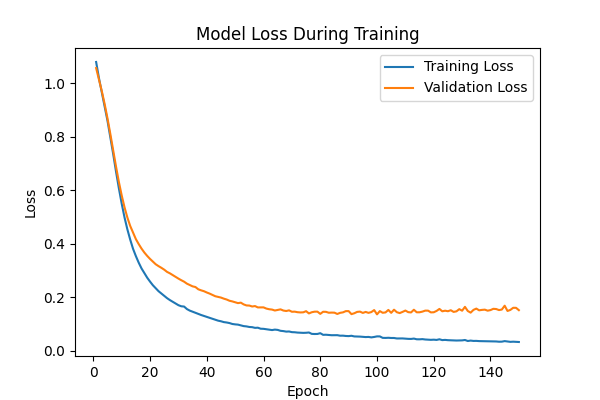

This plot from our model's training shows a rapid initial decrease in both training and validation losses, indicating effective learning and generalization. As the curves flatten around the 20th epoch, it suggests that the model is approaching convergence, effectively learning the underlying patterns rather than just memorizing the training data. The close proximity and parallel movement of the training and validation loss curves throughout the training process indicate good generalization. However, the slight divergence between the training and validation losses as training progresses suggests a beginning trend towards overfitting, where the model might start to learn the noise and fine details specific to the training data, potentially limiting its performance on new, unseen data. Given this potential for overfitting and the stability of the loss from around the 50th epoch onward, implementing early stopping in future training could optimize efficiency and prevent overtraining.

## Lesson Summary and Practice
And there you have it! You now know how to evaluate a TensorFlow model, which includes using the model's evaluate function, understanding the history object to extract valuable metrics, and finally, visualizing the performance using Matplotlib.

Up next, we have a few exercises for you. These exercises let you put what you've learned into practice, such as evaluating models and analyzing their performance. By the end of these exercises, you should feel confident and ready to evaluate any TensorFlow model you'll be working with in the future.

Starting these exercises as soon as you can will also help you get the best results from this lesson, so let's jump in and start coding!




## Understanding Model Performance Evaluation
Great job so far! In this task, you will evaluate a multi-class classification model built using TensorFlow.

This code imports the preprocessed Iris dataset, defines and compiles a model, trains the model, evaluates its performance on the test data, and visualizes the training and validation loss over epochs.

No changes to the code are needed. Simply run the code to see the outcome.

Observe the test accuracy, test loss, and the plotted graph showcasing the loss during model training.


```python

import tensorflow as tf
import matplotlib.pyplot as plt
from data_preprocessing import load_preprocessed_data

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_data=(X_test, y_test), verbose=0)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}, Test Loss: {test_loss}')

# Extract loss data from the history object
epochs = range(1, 151)  # Adjust the number of epochs to 150
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting actual training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

```


## Visualizing Accuracy for Model Evaluation

You've learned how to evaluate models with TensorFlow. Now, let's tweak some parameters.

Modify the code to change the plot from visualizing the training loss to visualizing the training and validation accuracy. Then, run the code to see observe these changes and have a better understanding on how to evaluate and visualize different metrics.

```py
import tensorflow as tf
import matplotlib.pyplot as plt
from data_preprocessing import load_preprocessed_data

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_data=(X_test, y_test), verbose=0)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}, Test Loss: {test_loss}')

# Extract accuracy data from the history object
epochs = range(1, 151)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting actual training and validation accuracies 
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



```

## Fixing Bugs in TensorFlow Evaluation

You've made excellent progress in evaluating TensorFlow models. Now, let's test your debugging skills. The code below should build, train, and evaluate a model using the testing set, but there's a bug.

Your task is to find and fix the bug. Debugging is key to mastering TensorFlow.

```python

import tensorflow as tf
import matplotlib.pyplot as plt
from data_preprocessing import load_preprocessed_data

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with the correct loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_data=(X_test, y_test), verbose=0)

# Evaluate on test data with the correct dataset
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy}, Test Loss: {loss}')

# Extract loss data from the history object
epochs = range(1, 151)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting actual training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

```

## Evaluate Model Accuracy and Loss

Great job so far! You have learned how model evaluation with TensorFlow works.

In this exercise, you will fill in the TODO comments to add the functionality needed to evaluate the model after training. This includes using the evaluate function and printing the test accuracy and loss.

```py
import tensorflow as tf
import matplotlib.pyplot as plt
from data_preprocessing import load_preprocessed_data

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_data=(X_test, y_test), verbose=0)

# TODO: Evaluate on test data and capture the accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# TODO: Print the test accuracy and test loss
print(f'Test Accuracy: {test_accuracy}, Test Loss: {test_loss}')

# Extract loss data from the history object
epochs = range(1, 151)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting actual training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


```

## Visualizing Model Performance and Evaluation

You have come a long way. Now, let's consolidate your understanding of evaluating a model's performance using TensorFlow.

In this task we have a trained model, and your mission is to implement the code to evaluate its performance based on test data. Visualize the training and validation loss over epochs using Matplotlib.

Use what you have learned about the Iris dataset and TensorFlow to complete the following task.


```py


```